In [2]:
file_path = f"C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"

In [3]:
# RK4 metoda
def runge_kutta_4(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(steps):
        t_n, y_n = t_values[-1], y_values[-1]
        k1 = f(t_n, y_n)
        k2 = f(t_n + h/2, y_n + h/2 * k1)
        k3 = f(t_n + h/2, y_n + h/2 * k2)
        k4 = f(t_n + h, y_n + h * k3)
        y_next = y_n + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t_next = t_n + h
        t_values.append(t_next)
        y_values.append(y_next)
    return np.array(t_values), np.array(y_values)

# Euler metoda
def euler(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(steps):
        t_n, y_n = t_values[-1], y_values[-1]
        y_next = y_n + h * f(t_n, y_n)
        t_next = t_n + h
        t_values.append(t_next)
        y_values.append(y_next)
    return np.array(t_values), np.array(y_values)

Zapisano plik: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/euler_method_plot.pdf


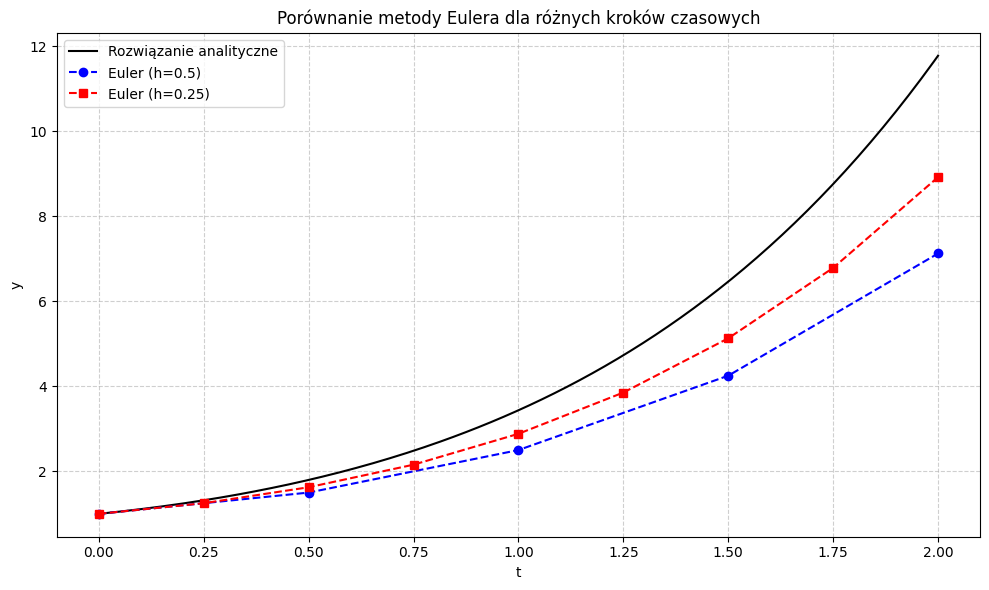

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji i jej pochodnej
def f(x, y):
    return x + y

def analytical_solution(x):
    return -x - 1 + 2 * np.exp(x)

# Parametry ogólne
x0, y0 = 0, 1
n = 4  # liczba dużych kroków (dla porównania obu metod na tym samym przedziale)

# --- Euler: h = 0.5 ---
h1 = 0.5
x1_values = [x0]
y1_values = [y0]

for i in range(n):
    xn, yn = x1_values[-1], y1_values[-1]
    y_next = yn + h1 * f(xn, yn)
    x_next = xn + h1
    x1_values.append(x_next)
    y1_values.append(y_next)

# --- Euler: h = 0.25 ---
h2 = 0.25
x2_values = [x0]
y2_values = [y0]
for i in range(2 * n):  # dwa razy więcej kroków, bo mniejszy h
    xn, yn = x2_values[-1], y2_values[-1]
    y_next = yn + h2 * f(xn, yn)
    x_next = xn + h2
    x2_values.append(x_next)
    y2_values.append(y_next)

# Rozwiązanie analityczne
x_analytical = np.linspace(x0, x0 + n * h1, 200)
y_analytical = analytical_solution(x_analytical)

# Wykres
plt.figure(figsize=(10, 6))

# Rozwiązanie dokładne
plt.plot(x_analytical, y_analytical, label='Rozwiązanie analityczne', color='black')

# Euler h=0.5
plt.plot(x1_values, y1_values, '--o', label='Euler (h=0.5)', color='blue')

# Euler h=0.25
plt.plot(x2_values, y2_values, '--s', label='Euler (h=0.25)', color='red')

# Oznaczenia
plt.xlabel('t')
plt.ylabel('y')
plt.title('Porównanie metody Eulera dla różnych kroków czasowych')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
# Zapisanie wykresu do pliku
file_name = file_path + '/euler_method_plot.pdf'
plt.savefig(file_name, format='pdf')
print(f"Zapisano plik: {file_name}")
plt.show()


Zapisano plik: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/euler_vs_RK4_method_plot.pdf


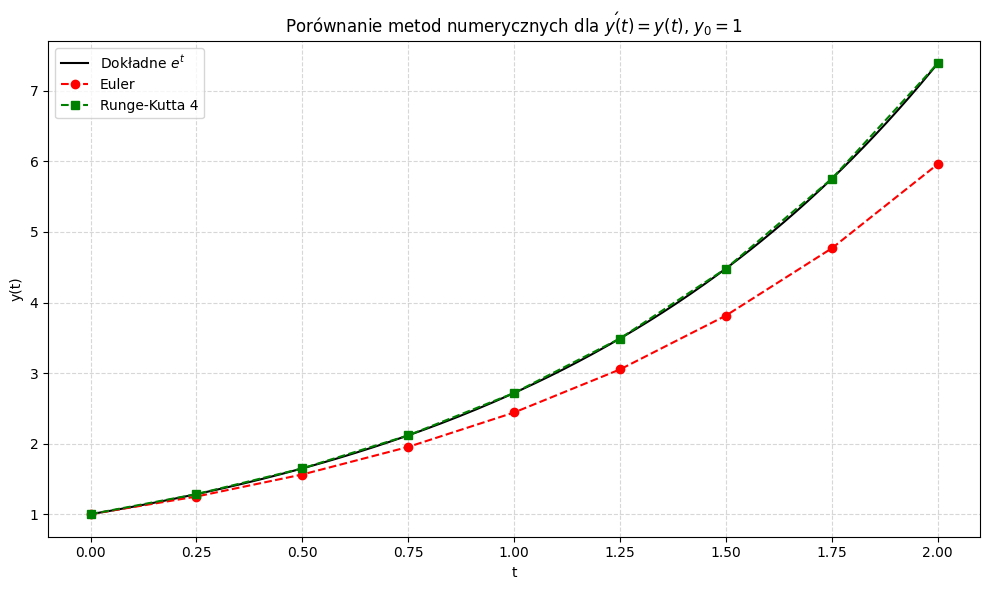

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja: y' = y
def f(t, y):
    return y

# Euler
def euler(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(steps):
        t_n, y_n = t_values[-1], y_values[-1]
        y_next = y_n + h * f(t_n, y_n)
        t_next = t_n + h
        t_values.append(t_next)
        y_values.append(y_next)
    return np.array(t_values), np.array(y_values)

# RK4
def runge_kutta_4(f, t0, y0, h, steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(steps):
        t_n, y_n = t_values[-1], y_values[-1]
        k1 = f(t_n, y_n)
        k2 = f(t_n + h/2, y_n + h/2 * k1)
        k3 = f(t_n + h/2, y_n + h/2 * k2)
        k4 = f(t_n + h, y_n + h * k3)
        y_next = y_n + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t_next = t_n + h
        t_values.append(t_next)
        y_values.append(y_next)
    return np.array(t_values), np.array(y_values)

# Parametry
t0 = 0
y0 = 1
t_end = 2
h = 0.25
steps = int((t_end - t0) / h)

# Rozwiązania numeryczne
t_euler, y_euler = euler(f, t0, y0, h, steps)
t_rk4, y_rk4 = runge_kutta_4(f, t0, y0, h, steps)

# Dokładne rozwiązanie
t_fine = np.linspace(t0, t_end, 300)
y_exact = np.exp(t_fine)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_exact, label='Dokładne $e^t$', color='black')
plt.plot(t_euler, y_euler, 'o--', label='Euler', color='red')
plt.plot(t_rk4, y_rk4, 's--', label='Runge-Kutta 4', color='green')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(r'Porównanie metod numerycznych dla $y\'(t) = y(t)$, $y_0=1$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
file_name = file_path + '/euler_vs_RK4_method_plot.pdf'
plt.savefig(file_name, format='pdf')
print(f"Zapisano plik: {file_name}")
plt.show()


Zapisano plik: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/numerical_method_plot.pdf


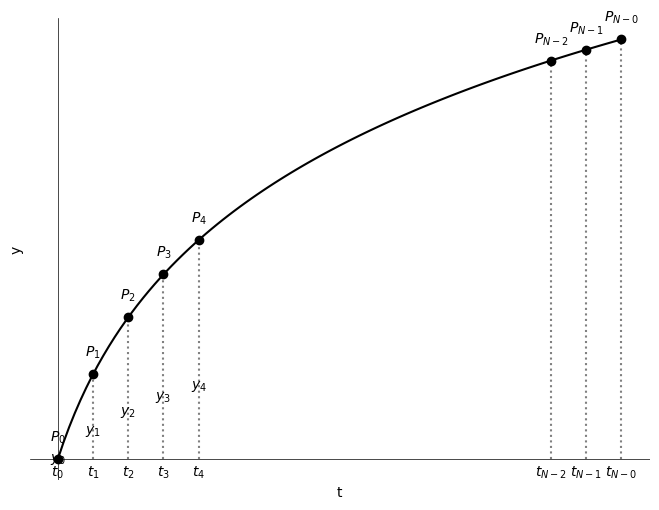

In [7]:
# Dane przykładowej funkcji
x = np.linspace(0, 10, 100)
y = np.log1p(x)

# Punkty do obliczeń
n = 17
x_points = np.linspace(0, 10, n)
y_points = np.log1p(x_points)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = log(1 + x)', color='black')


# Dodanie pionowych linii i punktów
for i, (xi, yi) in enumerate(zip(x_points[:5], y_points[:5])):
    plt.vlines(xi, 0, yi, colors='gray', linestyles='dotted')
    plt.scatter(xi, yi, color='black', zorder=5)
    plt.text(xi, yi + 0.1, f'$P_{i}$', fontsize=10, ha='center')
    plt.text(xi, -0.1, f'$t_{i}$', fontsize=10, ha='center')
    plt.text(xi, yi / 3, f'$y_{{{i}}}$', fontsize=10, ha='center', va='center', rotation=0)

for i, (xi, yi) in enumerate(zip(x_points[-3:], y_points[-3:])):
    plt.vlines(xi, 0, yi, colors='gray', linestyles='dotted')
    plt.scatter(xi, yi, color='black', zorder=5)
    plt.text(xi, yi + 0.1, f'$P_{{N-{(2-i)}}}$', fontsize=10, ha='center')
    plt.text(xi, -0.1, f'$t_{{N-{(2-i)}}}$', fontsize=10, ha='center')


# Oznaczenie osi i punktu początkowego
plt.xticks([])
plt.yticks([])
plt.xlabel('t')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Dodanie legendy i siatki
# plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
# plt.title('Przykładowy wykres z punktami i liniami')

file_name = file_path + '/numerical_method_plot.pdf'
plt.savefig(file_name, format='pdf')
print(f"Zapisano plik: {file_name}")
plt.show()



[0.9        0.8999547  0.89981881 0.89959238 0.89927547 0.89886817
 0.89837062 0.89778296 0.89710537 0.89633805 0.89548123 0.89453518
 0.89350017 0.89237652 0.89116456 0.88986466 0.88847721 0.88700263
 0.88544135 0.88379384 0.8820606  0.88024214 0.878339   0.87635174
 0.87428097 0.87212729 0.86989133 0.86757377 0.86517528 0.86269656
 0.86013836 0.85750141 0.85478649 0.85199439 0.84912592 0.84618193
 0.84316325 0.84007077 0.83690538 0.83366798 0.83035951 0.82698091
 0.82353316 0.82001722 0.81643409 0.8127848  0.80907036 0.80529183
 0.80145026 0.79754672 0.79358229 0.78955809 0.78547521 0.78133479
 0.77713795 0.77288585 0.76857963 0.76422047 0.75980954 0.75534802
 0.75083711 0.74627801 0.74167192 0.73702007 0.73232366 0.72758393
 0.7228021  0.71797943 0.71311713 0.70821647 0.70327868 0.69830501
 0.69329673 0.68825507 0.68318129 0.67807666 0.67294241 0.66777982
 0.66259012 0.65737457 0.65213443 0.64687093 0.64158532 0.63627884
 0.63095273 0.62560822 0.62024654 0.61486891 0.60947654 0.6040

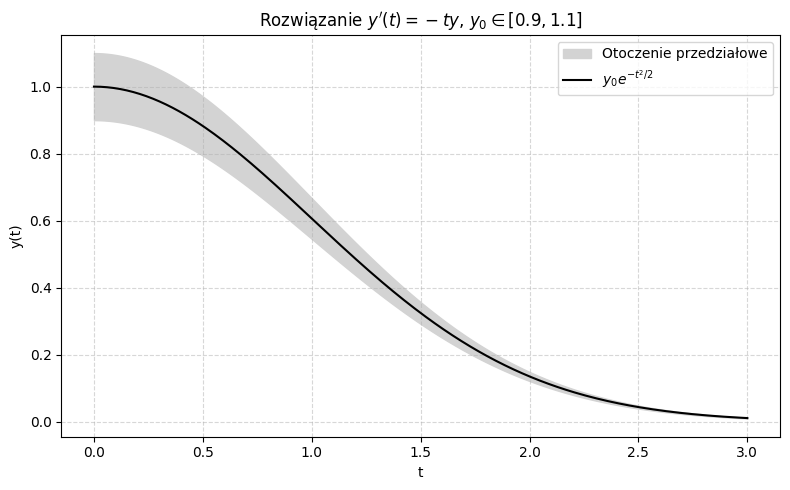

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
t = np.linspace(0, 3, 300)
y0_interval = [0.9, 1.1]  # Przedział początkowy y0

# Wspólny wykładnik (dla każdego t)
exp_part = np.exp(-t**2 / 2)

# Dolna i górna granica rozwiązania dla każdego t
y_lower = y0_interval[0] * exp_part
y_upper = y0_interval[1] * exp_part
y_center = ((y0_interval[0] + y0_interval[1]) / 2) * exp_part
# Rysowanie wykresu
plt.figure(figsize=(8, 5))

# Wypełnienie obszaru przedziałowego
plt.fill_between(t, y_lower, y_upper, color='lightgray', label='Otoczenie przedziałowe')

# Rozwiązanie dla środka przedziału (dla przejrzystości)
plt.plot(t, y_center, color='black', label=r'$y_0 e^{-t^2/2}$')

# Opis osi
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(r'Rozwiązanie $y^\prime(t) = -t y$, $y_0 \in [0.9, 1.1]$')

# Legenda
plt.legend()

# Siatka
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Zapisano plik: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/euler_vs_rigorous_method_plot.pdf


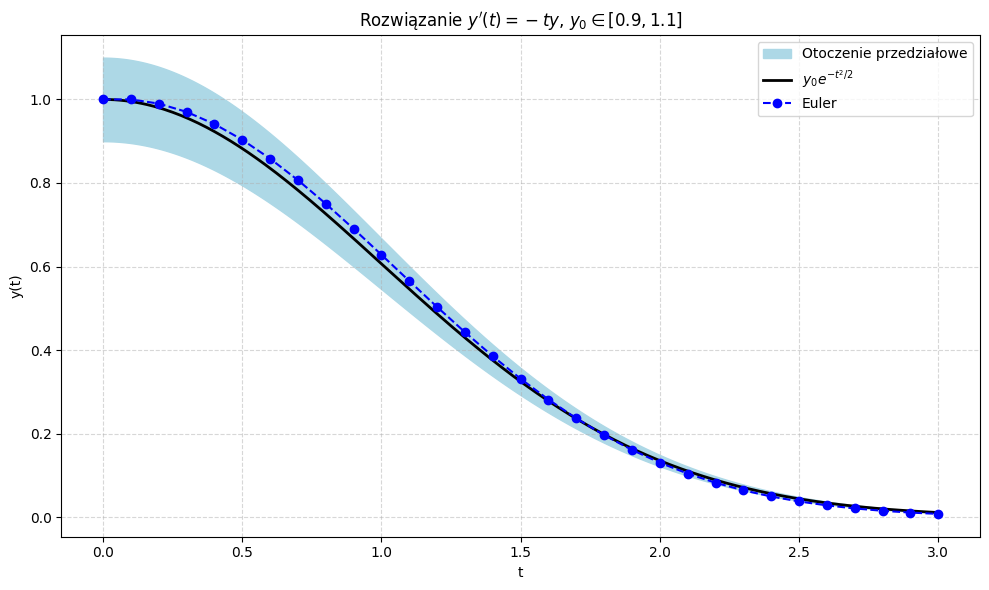

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja pochodna: y' = -t * y
def f(t, y):
    return -t * y


# Parametry
t0 = 0
t_end = 3
h = 0.1
steps = int((t_end - t0) / h)
y0_interval = [0.9, 1.1]
y0_center = (y0_interval[0] + y0_interval[1]) / 2  # y0 = 1.0

# Siatka do rozwiązania dokładnego
t_fine = np.linspace(t0, t_end, 300)
exp_part = np.exp(-t_fine**2 / 2)
y_lower = y0_interval[0] * exp_part
y_upper = y0_interval[1] * exp_part
y_center = y0_center * exp_part

# Rozwiązania numeryczne
t_euler, y_euler = euler(f, t0, y0_center, h, steps)
# t_rk4, y_rk4 = runge_kutta_4(f, t0, y0_center, h, steps)

# Wykres
plt.figure(figsize=(10, 6))

# Przedziałowe otoczenie
plt.fill_between(t_fine, y_lower, y_upper, color='lightblue', label='Otoczenie przedziałowe')

# Rozwiązanie dokładne (dla środka przedziału)
plt.plot(t_fine, y_center, color='black', linewidth=2, label=r'$y_0 e^{-t^2/2}$')

# Rozwiązanie metodą Eulera
plt.plot(t_euler, y_euler, 'o--', color='blue', label='Euler')

# Rozwiązanie metodą RK4
# plt.plot(t_rk4, y_rk4, 's--', color='green', label='Runge-Kutta 4')

# Opisy osi
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(r'Rozwiązanie $y^\prime(t) = -t y$, $y_0 \in [0.9, 1.1]$')

# Legenda i siatka
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
file_name = file_path + '/euler_vs_rigorous_method_plot.pdf'
plt.savefig(file_name, format='pdf')
print(f"Zapisano plik: {file_name}")
plt.show()


Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/solution_output_taylor.pdf


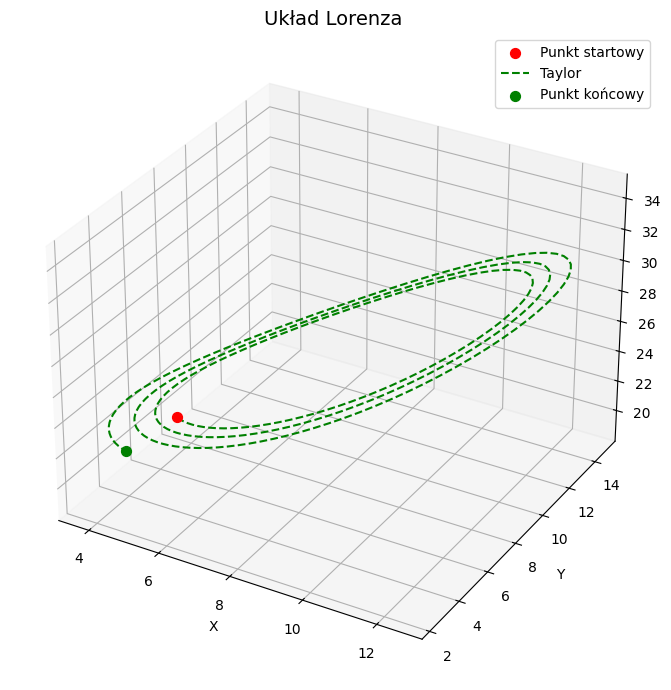

In [33]:
# trajectory_for_Taylor_only_to_time_5.000000_N_28_start_point1.csv
# OBRAZEK

import pandas as pd
import matplotlib.pyplot as plt

N_taylor = 28
start_point_taylor = 1

df = pd.read_csv(f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/solution_output.csv")


fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(5, 5, 23, color='red', s=50, label=f'Punkt startowy')

color_tay = 'green'
ax.plot(df['x_tay'], df['y_tay'], df['z_tay'], color=color_tay, label=f'Taylor', linestyle='--', alpha=1)
ax.scatter(df['x_tay'].iloc[-1], df['y_tay'].iloc[-1], df['z_tay'].iloc[-1], color=color_tay, s=50, label=f'Punkt końcowy')


ax.set_title(f'Układ Lorenza', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.tight_layout()

file_name = file_path + f'/solution_output_taylor.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()

Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/trajektoria_3d_combined_FULL_43_base_time_step_0.400000_nu_1.100000_attempt_nr_10.pdf


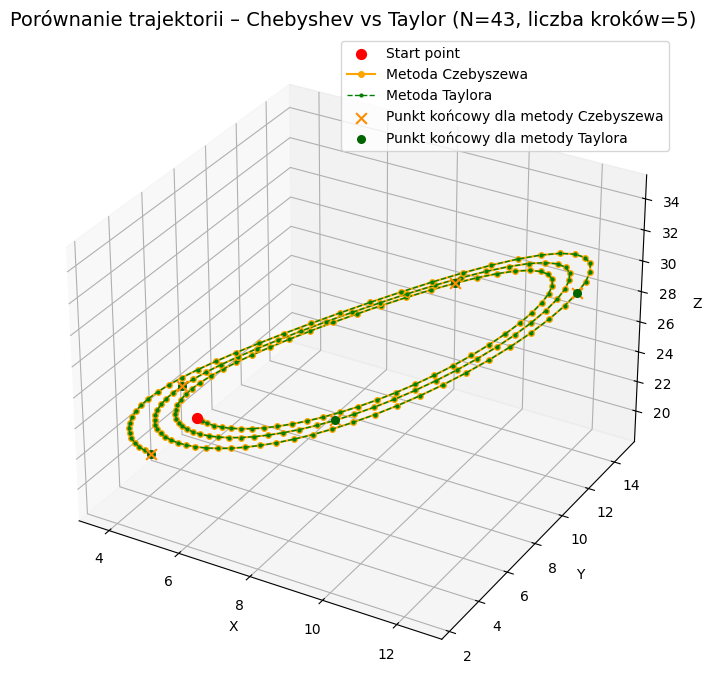

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# string name = "trajectoryN_" + std::to_string(N) + "_step_" + std::to_string(step)
#             + "_base_time_step_" + std::to_string(base_time_step) +
#             + "_nu_" + std::to_string(nu) + "_attempt_nr_" + std::to_string(attempt_nr) + ".csv";

# --- PARAMETRY ---
N = 43
liczba_krokow = 5
nu = 1.1
base_time_step = 0.4
attempt_nr = 10


# --- WCZYTYWANIE TRAJEKTORII (Czebyszew i Taylor w jednym pliku na krok) ---
df_list = []
for i in range(liczba_krokow):
    df = pd.read_csv(
        f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/"
        f"trajectoryN_{N}_step_{i}_base_time_step_{base_time_step:.6f}_nu_{nu:.6f}_attempt_nr_{attempt_nr}.csv"
    )
    df_list.append(df)

# --- RYSOWANIE ---
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Punkt startowy
ax.scatter(5, 5, 23, color='red', s=50, label='Start point')

color_cheb = 'orange'
color_taylor = 'green'

# --- CZEBYSZEW I TAYLOR KROK PO KROKU ---
for i, df in enumerate(df_list):
    # Trajektorie
    ax.plot(df['x_cheb'], df['y_cheb'], df['z_cheb'], color=color_cheb, marker='o', markersize=4, linestyle='-', label=f'Metoda Czebyszewa' if i == 0 else "")
    ax.plot(df['x_tay'], df['y_tay'], df['z_tay'], color=color_taylor, marker='o', markersize=2, linestyle='--', linewidth=1, label=f'Metoda Taylora' if i == 0 else "")


    # Punkty końcowe
    ax.scatter(df['x_cheb'].iloc[-1], df['y_cheb'].iloc[-1], df['z_cheb'].iloc[-1],
               color='darkorange', s=60, marker='x', label=f'Punkt końcowy dla metody Czebyszewa' if i == 0 else "")
    ax.scatter(df['x_tay'].iloc[-1], df['y_tay'].iloc[-1], df['z_tay'].iloc[-1],
               color='darkgreen', s=30, marker='o', label=f'Punkt końcowy dla metody Taylora' if i == 0 else "")
    # ax.view_init(elev=25, azim=120)


# --- OPISY I ZAPIS ---
ax.set_title(f'Porównanie trajektorii – Chebyshev vs Taylor (N={N}, liczba kroków={liczba_krokow})', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.tight_layout()

file_path = "C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"
file_name = file_path + f'/trajektoria_3d_combined_FULL_{N}_base_time_step_{base_time_step:.6f}_nu_{nu:.6f}_attempt_nr_{attempt_nr}.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()


Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/rzut_xy_43_nr_steps5_start_point1.pdf


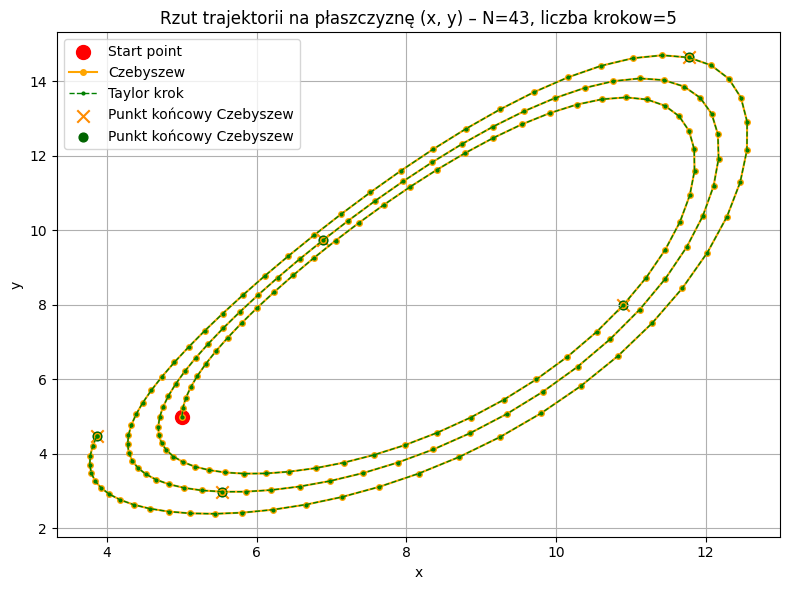

In [61]:
# --- PARAMETRY ---
N = 43
liczba_krokow = 5
nu = 1.1
base_time_step = 0.4
attempt_nr = 10


# --- WCZYTYWANIE TRAJEKTORII (Czebyszew i Taylor w jednym pliku na krok) ---
df_list = []
for i in range(liczba_krokow):
    df = pd.read_csv(
        f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/"
        f"trajectoryN_{N}_step_{i}_base_time_step_{base_time_step:.6f}_nu_{nu:.6f}_attempt_nr_{attempt_nr}.csv"
    )
    df_list.append(df)

plt.figure(figsize=(8, 6))

plt.scatter(5, 5, color='red', s=100, label='Start point')
for i, df in enumerate(df_list):
    plt.plot(df['x_cheb'], df['y_cheb'], label=f'Czebyszew' if i == 0 else "", marker='o', markersize=4, linestyle='-', color=color_cheb)
    plt.plot(df['x_tay'], df['y_tay'], color=color_taylor, label=f'Taylor krok' if i == 0 else "", marker='o', linestyle='--', markersize=2, linewidth=1)
    plt.scatter(df['x_cheb'].iloc[-1], df['y_cheb'].iloc[-1], color='darkorange', s=80, marker='x',  label=f'Punkt końcowy Czebyszew' if i == 0 else "")
    plt.scatter(df['x_cheb'].iloc[-1], df['y_cheb'].iloc[-1], color='darkgreen', s=40, marker='o', label=f'Punkt końcowy Czebyszew' if i == 0 else "")



plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Rzut trajektorii na płaszczyznę (x, y) – N={N}, liczba krokow={liczba_krokow}')
plt.legend()
plt.grid()
plt.tight_layout()

file_path = "C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"
file_name = file_path + f'/rzut_xy_{N}_nr_steps{liczba_krokow}_start_point1.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()

Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/rzut_yz_43_nr_steps5_start_point1.pdf


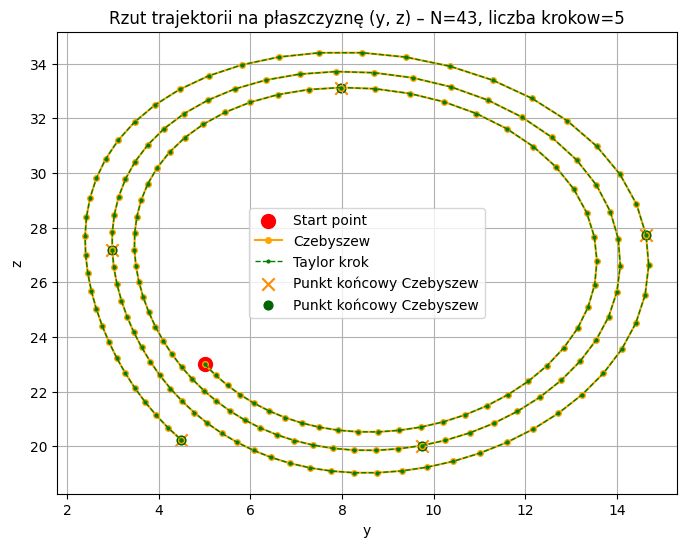

In [62]:
# --- PARAMETRY ---
N = 43
liczba_krokow = 5
nu = 1.1
base_time_step = 0.4
attempt_nr = 10


# --- WCZYTYWANIE TRAJEKTORII (Czebyszew i Taylor w jednym pliku na krok) ---
df_list = []
for i in range(liczba_krokow):
    df = pd.read_csv(
        f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/"
        f"trajectoryN_{N}_step_{i}_base_time_step_{base_time_step:.6f}_nu_{nu:.6f}_attempt_nr_{attempt_nr}.csv"
    )
    df_list.append(df)

plt.figure(figsize=(8, 6))

plt.scatter(5, 23, color='red', s=100, label='Start point')
for i, df in enumerate(df_list):
    plt.plot(df['y_cheb'], df['z_cheb'], label=f'Czebyszew' if i == 0 else "", marker='o', markersize=4, linestyle='-', color=color_cheb)
    plt.plot(df['y_tay'], df['z_tay'], color=color_taylor, label=f'Taylor krok' if i == 0 else "", marker='o', markersize=2, linestyle='--', linewidth=1)
    plt.scatter(df['y_cheb'].iloc[-1], df['z_cheb'].iloc[-1], color='darkorange', s=80, marker='x', label=f'Punkt końcowy Czebyszew' if i == 0 else "")
    plt.scatter(df['y_cheb'].iloc[-1], df['z_cheb'].iloc[-1], color='darkgreen', s=40, marker='o', label=f'Punkt końcowy Czebyszew' if i == 0 else "")



plt.xlabel('y')
plt.ylabel('z')
plt.title(f'Rzut trajektorii na płaszczyznę (y, z) – N={N}, liczba krokow={liczba_krokow}')
plt.legend()
plt.grid()

file_path = "C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"
file_name = file_path + f'/rzut_yz_{N}_nr_steps{liczba_krokow}_start_point1.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()

Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/rzut_xz_43_nr_steps5_start_point1.pdf


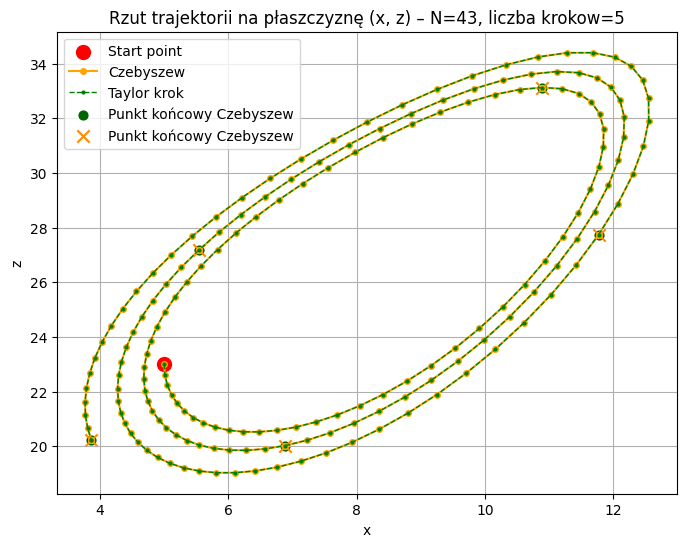

In [63]:
# --- PARAMETRY ---
N = 43
liczba_krokow = 5
nu = 1.1
base_time_step = 0.4
attempt_nr = 10


# --- WCZYTYWANIE TRAJEKTORII (Czebyszew i Taylor w jednym pliku na krok) ---
df_list = []
for i in range(liczba_krokow):
    df = pd.read_csv(
        f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/"
        f"trajectoryN_{N}_step_{i}_base_time_step_{base_time_step:.6f}_nu_{nu:.6f}_attempt_nr_{attempt_nr}.csv"
    )
    df_list.append(df)

plt.figure(figsize=(8, 6))

plt.scatter(5, 23, color='red', s=100, label='Start point')
for i, df in enumerate(df_list):
    plt.plot(df['x_cheb'], df['z_cheb'], label=f'Czebyszew' if i == 0 else "", marker='o', linestyle='-', markersize=4, color=color_cheb)
    plt.plot(df['x_tay'], df['z_tay'], color=color_taylor, label=f'Taylor krok' if i == 0 else "", marker='o', markersize=2, linestyle='--', linewidth=1)
    plt.scatter(df['x_cheb'].iloc[-1], df['z_cheb'].iloc[-1], color='darkgreen', s=40, marker='o', label=f'Punkt końcowy Czebyszew' if i == 0 else "")
    plt.scatter(df['x_cheb'].iloc[-1], df['z_cheb'].iloc[-1], color='darkorange', s=80, marker='x', label=f'Punkt końcowy Czebyszew' if i == 0 else "")



plt.xlabel('x')
plt.ylabel('z')
plt.title(f'Rzut trajektorii na płaszczyznę (x, z) – N={N}, liczba krokow={liczba_krokow}')
plt.legend()
plt.grid()

file_path = "C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"
file_name = file_path + f'/rzut_xz_{N}_nr_steps{liczba_krokow}_start_point1.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()


Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/roznica_w_czasieN_23.pdf


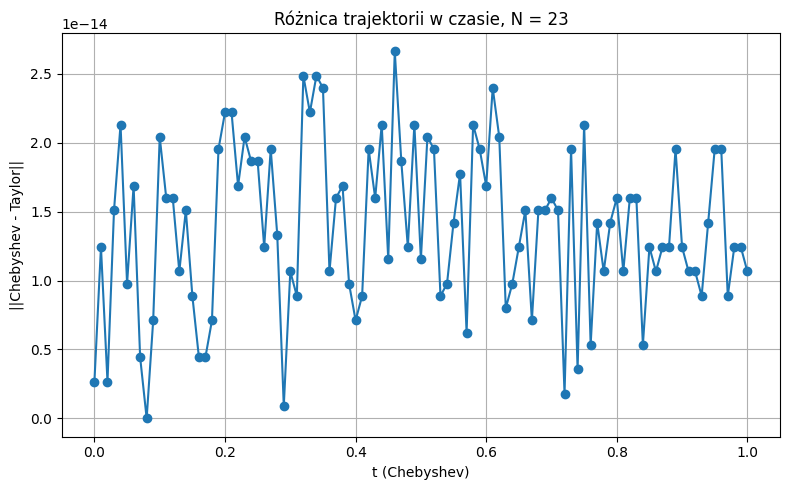

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# --- PARAMETRY ---
N = 23
liczba_krokow = 1
start_point = 1
delta = 0.250000
nu = 1.1

# --- WCZYTYWANIE TRAJEKTORII (Czebyszew i Taylor w jednym pliku na krok) ---
df_list = []
for i in range(liczba_krokow):
    df = pd.read_csv(
        f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/"
        f"trajectoryN_{N}_step_{i}_NRsteps_{liczba_krokow}_delta_{delta:.6f}_start_point{start_point}_nu_{nu:.6f}.csv"
    )
    df_list.append(df)

plt.figure(figsize=(8, 5))
for i, df in enumerate(df_list):
    plt.plot(df['t_chebyshev'], df['diff_norm'], marker='o')
plt.xlabel("t (Chebyshev)")
plt.ylabel("||Chebyshev - Taylor||")
plt.title(f"Różnica trajektorii w czasie, N = {N}")
plt.grid(True)
plt.tight_layout()


file_path = "C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"
file_name = file_path + f'/roznica_w_czasieN_{N}.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()



Zapisano: C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots/chebyshev_errors_vs_taylor.pdf


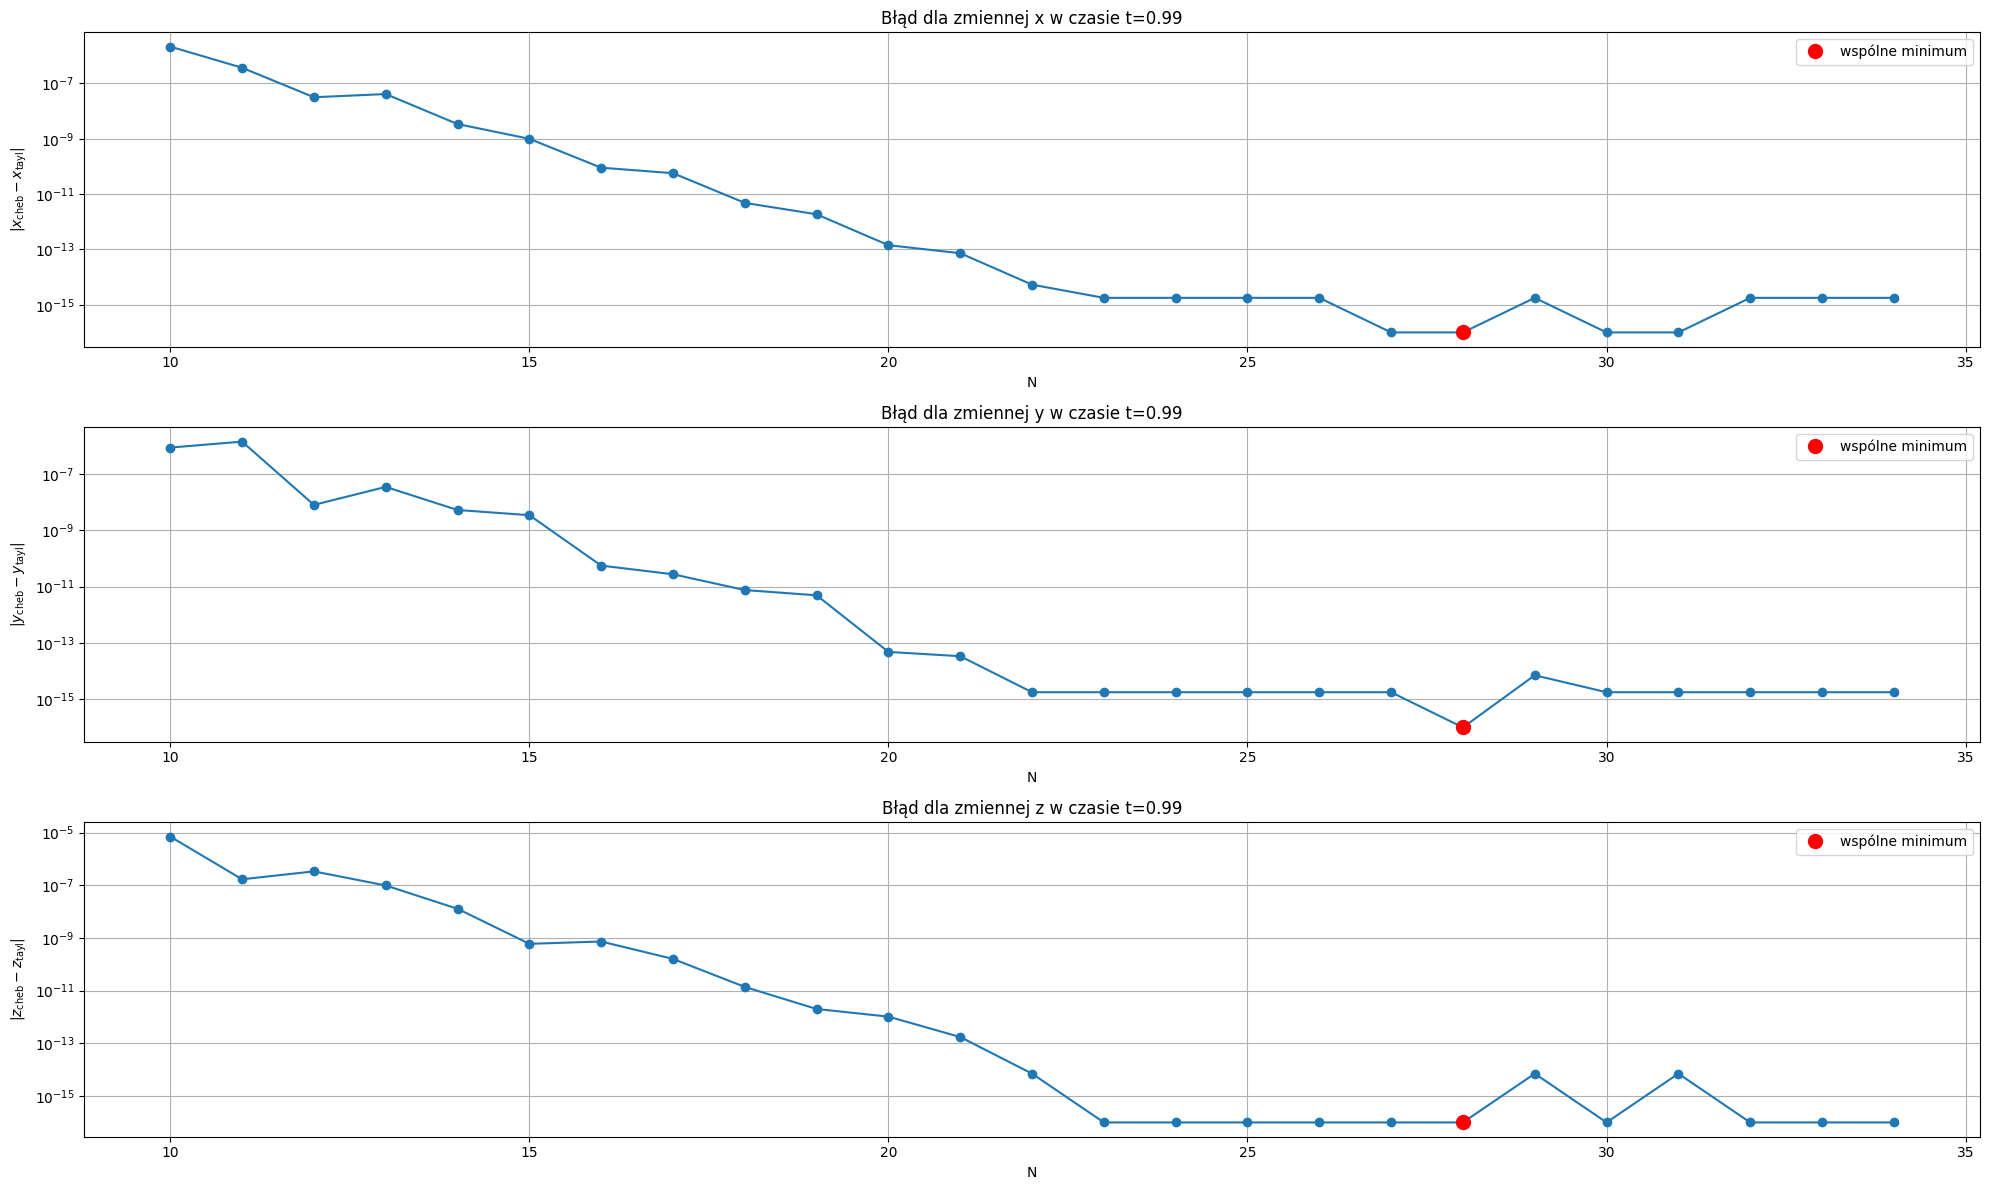

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- PARAMETRY ---
liczba_krokow = 1
start_point = 1
delta = 0.250000
nu = 1.1

files_info = [(f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/trajectoryN_{N}_step_0_NRsteps_{liczba_krokow}_delta_{delta:.6f}_start_point{start_point}_nu_{nu:.6f}.csv", N) for N in range(10, 35)]

selected_times = [0.99]
tolerance = 1e-3  # dokładność dopasowania czasu

# Wczytaj dane referencyjne z Taylora (N=28)
taylor_file = f"C:/Users/agsud_z3nlru4/CLionProjects/master_algorithm/cmake-build-debug-wsl/trajectoryN_28_step_0_NRsteps_{liczba_krokow}_delta_{delta:.6f}_start_point{start_point}_nu_{nu:.6f}.csv"
df_taylor = pd.read_csv(taylor_file)

reference_values = {}
for t in selected_times:
    df_sub = df_taylor[(df_taylor['t_chebyshev'] - t).abs() < tolerance]
    if not df_sub.empty:
        row = df_sub.iloc[0]
        reference_values[t] = [row['x_cheb'], row['y_cheb'], row['z_cheb']]

# Przechowywanie wyników: {czas: {N: [x, y, z]}}
data = {t: {} for t in selected_times}

# Wczytaj dane z każdego pliku
for (filename, N) in files_info:
    if not os.path.exists(filename):
        print(f"Plik {filename} nie znaleziony. Pomijam.")
        continue
    df = pd.read_csv(filename)
    for t_target in selected_times:
        df_sub = df[(df['t_chebyshev'] - t_target).abs() < tolerance]
        if not df_sub.empty:
            row = df_sub.iloc[0]
            data[t_target][N] = [row['x_cheb'], row['y_cheb'], row['z_cheb']]

# Rysowanie wykresów błędów względem Taylora (N=28)
fig, axes = plt.subplots(3, 1, figsize=(20, 12))  # 3 wiersze, 1 kolumna
variables = ['x', 'y', 'z']

for t in selected_times:
    Ns = sorted(data[t].keys())
    errors_all_vars = []

    # Oblicz błędy dla każdej zmiennej
    for var_idx in range(3):
        values = [data[t][N][var_idx] for N in Ns]
        ref_value = reference_values[t][var_idx]
        errors = [max(abs(val - ref_value), 1e-16) for val in values]
        errors_all_vars.append(errors)

    # Szukamy indeksów, które są minimum we wszystkich zmiennych
    common_min_indices = []
    for i in range(len(Ns)):
        if all(errors_all_vars[var_idx][i] == min(errors_all_vars[var_idx]) for var_idx in range(3)):
            common_min_indices.append(i)

    # Rysuj wykresy
    for var_idx, var_name in enumerate(variables):
        ax = axes[var_idx]
        errors = errors_all_vars[var_idx]

        ax.plot(Ns, errors, 'o-', markersize=6)
        ax.set_yscale("log")
        ax.set_title(f'Błąd dla zmiennej {var_name} w czasie t={t}')
        ax.set_xlabel('N')
        ax.set_ylabel(f'$|{var_name}_{{\\mathrm{{cheb}}}} - {var_name}_{{\\mathrm{{tay}}}}|$')
        ax.grid(True)

        # Zaznacz wspólne minima
        for i in common_min_indices:
            ax.plot(Ns[i], errors[i], 'ro', markersize=10, label='wspólne minimum' if i == common_min_indices[0] else "")
        if common_min_indices:
            ax.legend()

plt.tight_layout()
file_path = "C:/Users/agsud_z3nlru4/OneDrive/Dokumenty/STUDIA/MAGISTERKA/plots"
file_name = file_path + f'/chebyshev_errors_vs_taylor.pdf'
plt.savefig(file_name, dpi=300, format='pdf')
print(f"Zapisano: {file_name}")
plt.show()
